# SENTIMENT ANALYSIS ON IPHONE REVIEWS

# IMPORTING PACKAGES

In [434]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from textblob import TextBlob
import re
import string
import neattext.functions as nf
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATA

In [435]:
data = pd.read_csv('apple_iphone_11_reviews.csv')

In [436]:
data

,product,helpful_count,total_comments,review_country,reviewed_at,review_text,Review rating out of 5,review_title
0,Apple iPhone XR (64GB) - Black,"5,087",24,India,12/12/18,NOTE:,3,"Which iPhone you should Purchase ? iPhone 8, X, XS, XR ?"
1,Apple iPhone XR (64GB) - Black,"2,822",6,India,11/17/18,Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I haven't got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees.,1,Don't buy iPhone xr from Amazon.
2,Apple iPhone XR (64GB) - Black,"1,798",0,India,1/27/19,Amazing phone with amazing camera coming from iPhone 7 plus great service from amazon,5,Happy with the purchase
3,Apple iPhone XR (64GB) - Black,"1,366",14,India,5/2/19,"So I got the iPhone XR just today. The product looks amazing. But unfortunately the Face ID is not working and there’s a glitch in the front camera’s portrait mode. That’s fine, it may happen. But what’s not fine is the pathetic service provided by amazon and apple. Firstly, amazon takes no resp...",1,Amazon is not an apple authorised reseller. Please take a note.
4,Apple iPhone XR (64GB) - Black,536,5,India,5/24/19,I've been an android user all my life until I decided to try iPhone XR for iOS. Loving the camera and battery life is an absolute joy to have. It's been more than one month since I got this phone and I'm loving it. Face ID works flawlessly even in the dark and the dual sim function is working li...,5,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...,...,...
5005,Apple iPhone XR (64GB) - Black,0,0,India,11/13/19,Dhamaka,4,Dhamaka phone
5006,Apple iPhone XR (64GB) - Black,0,0,India,11/15/19,Goodbye,4,Good
5007,Apple iPhone XR (64GB) - Black,0,0,India,12/29/19,Nothing,5,Fantabulous phone. Easy to use.
5008,Apple iPhone XR (64GB) - Black,0,0,India,11/10/19,Superbb,5,Fantastic


In [437]:
test = data.copy(deep=True)
test.loc[test['Review rating out of 5'] == 5, 'Review rating out of 5'] == 'Positive'

2       False
4       False
6       False
12      False
14      False
        ...  
5003    False
5004    False
5007    False
5008    False
5009    False
Name: Review rating out of 5, Length: 3731, dtype: bool

In [438]:
data = data.rename(columns={"Review rating out of 5": "review_rating"})


Text(0.5, 1.0, 'Rating Distribution - Review Rating')

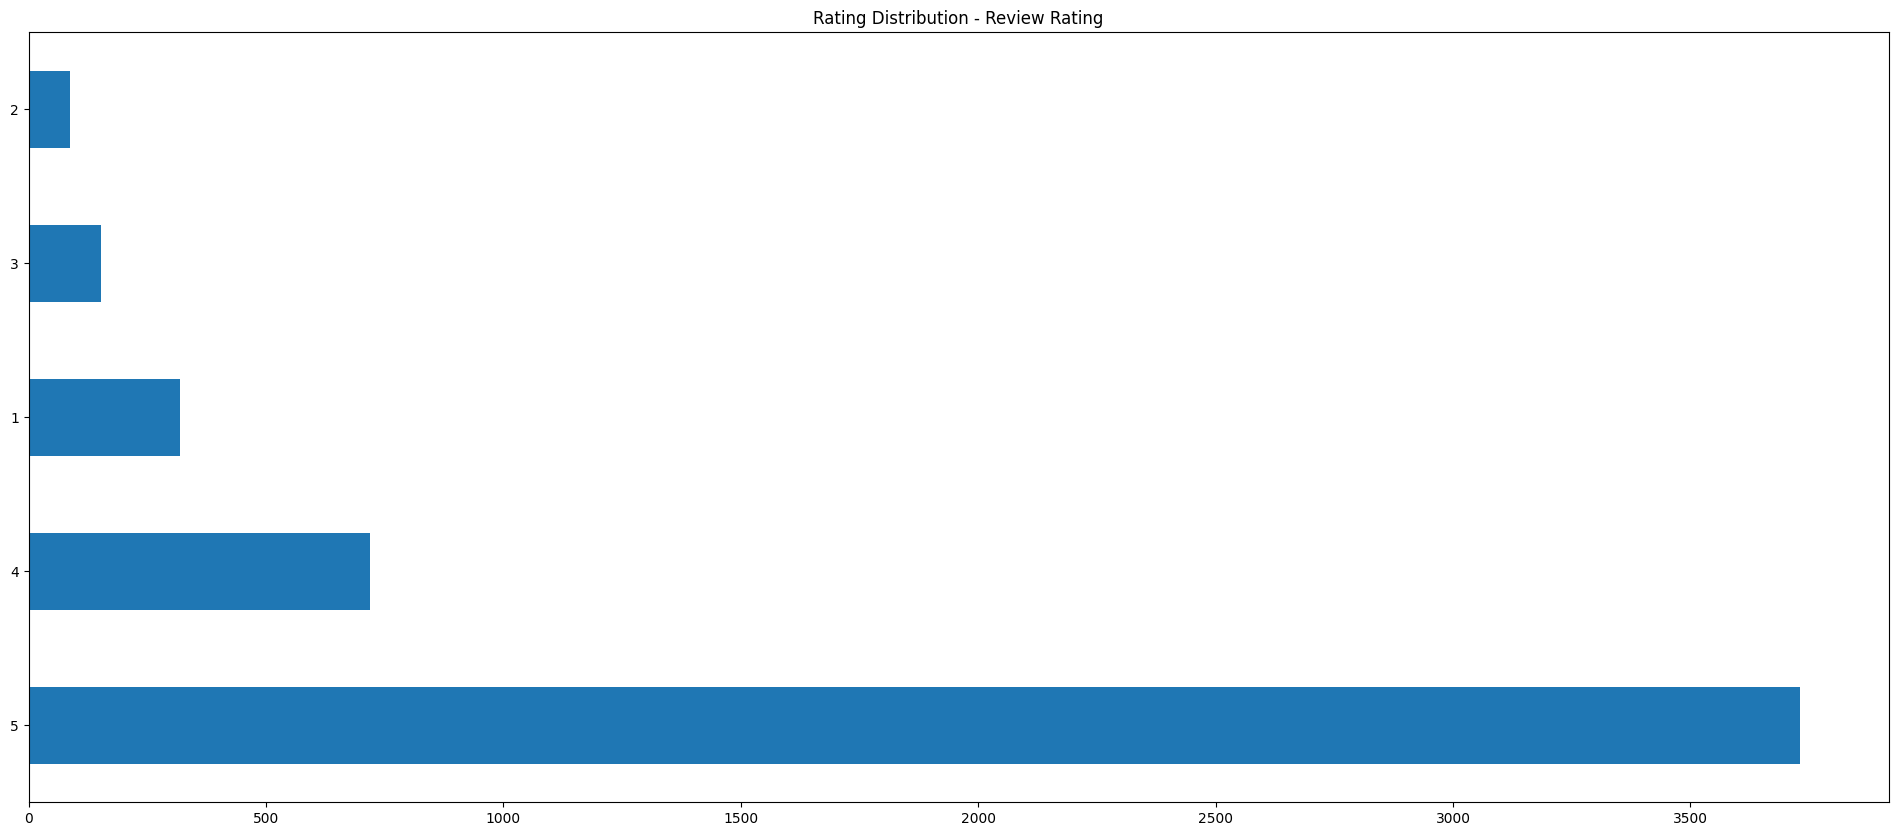

In [439]:
fig, ax = plt.subplots(figsize=(24, 10))

data.review_rating.value_counts().plot.barh( ax=ax)
ax.set_title("Rating Distribution - Review Rating")

# Displaying Data Information

In [440]:
data.head()

,product,helpful_count,total_comments,review_country,reviewed_at,review_text,review_rating,review_title
0,Apple iPhone XR (64GB) - Black,"5,087",24,India,12/12/18,NOTE:,3,"Which iPhone you should Purchase ? iPhone 8, X, XS, XR ?"
1,Apple iPhone XR (64GB) - Black,"2,822",6,India,11/17/18,Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I haven't got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees.,1,Don't buy iPhone xr from Amazon.
2,Apple iPhone XR (64GB) - Black,"1,798",0,India,1/27/19,Amazing phone with amazing camera coming from iPhone 7 plus great service from amazon,5,Happy with the purchase
3,Apple iPhone XR (64GB) - Black,"1,366",14,India,5/2/19,"So I got the iPhone XR just today. The product looks amazing. But unfortunately the Face ID is not working and there’s a glitch in the front camera’s portrait mode. That’s fine, it may happen. But what’s not fine is the pathetic service provided by amazon and apple. Firstly, amazon takes no resp...",1,Amazon is not an apple authorised reseller. Please take a note.
4,Apple iPhone XR (64GB) - Black,536,5,India,5/24/19,I've been an android user all my life until I decided to try iPhone XR for iOS. Loving the camera and battery life is an absolute joy to have. It's been more than one month since I got this phone and I'm loving it. Face ID works flawlessly even in the dark and the dual sim function is working li...,5,Excellent Battery life and buttery smooth UI


In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         5010 non-null   object
 1   helpful_count   5010 non-null   object
 2   total_comments  5010 non-null   int64 
 3   review_country  5010 non-null   object
 4   reviewed_at     5010 non-null   object
 5   review_text     5007 non-null   object
 6   review_rating   5010 non-null   int64 
 7   review_title    5008 non-null   object
dtypes: int64(2), object(6)
memory usage: 313.3+ KB


In [442]:
len(data)

5010

In [443]:
data.shape

(5010, 8)

In [444]:
data.duplicated().sum()

38

In [445]:
data.drop_duplicates(inplace=True)
data

,product,helpful_count,total_comments,review_country,reviewed_at,review_text,review_rating,review_title
0,Apple iPhone XR (64GB) - Black,"5,087",24,India,12/12/18,NOTE:,3,"Which iPhone you should Purchase ? iPhone 8, X, XS, XR ?"
1,Apple iPhone XR (64GB) - Black,"2,822",6,India,11/17/18,Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I haven't got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees.,1,Don't buy iPhone xr from Amazon.
2,Apple iPhone XR (64GB) - Black,"1,798",0,India,1/27/19,Amazing phone with amazing camera coming from iPhone 7 plus great service from amazon,5,Happy with the purchase
3,Apple iPhone XR (64GB) - Black,"1,366",14,India,5/2/19,"So I got the iPhone XR just today. The product looks amazing. But unfortunately the Face ID is not working and there’s a glitch in the front camera’s portrait mode. That’s fine, it may happen. But what’s not fine is the pathetic service provided by amazon and apple. Firstly, amazon takes no resp...",1,Amazon is not an apple authorised reseller. Please take a note.
4,Apple iPhone XR (64GB) - Black,536,5,India,5/24/19,I've been an android user all my life until I decided to try iPhone XR for iOS. Loving the camera and battery life is an absolute joy to have. It's been more than one month since I got this phone and I'm loving it. Face ID works flawlessly even in the dark and the dual sim function is working li...,5,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...,...,...
5005,Apple iPhone XR (64GB) - Black,0,0,India,11/13/19,Dhamaka,4,Dhamaka phone
5006,Apple iPhone XR (64GB) - Black,0,0,India,11/15/19,Goodbye,4,Good
5007,Apple iPhone XR (64GB) - Black,0,0,India,12/29/19,Nothing,5,Fantabulous phone. Easy to use.
5008,Apple iPhone XR (64GB) - Black,0,0,India,11/10/19,Superbb,5,Fantastic


In [446]:
data.duplicated().sum()

0

In [447]:
reviews_df = data
reviews_df.shape

(4972, 8)

# Calculating Sentiment Polarity and Subjectivity

In [448]:
polarity = []
subjectivity = []
for i in reviews_df['review_text'].values:
    try:
        analysis = TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    except:
        polarity.append(0)
        subjectivity.append(0)

In [449]:
reviews_df['polarity'] = polarity
reviews_df['subjectivity'] = subjectivity

# Displaying Reviews with newly added Columns

In [450]:
reviews_df[reviews_df.polarity<0].head(10)

,product,helpful_count,total_comments,review_country,reviewed_at,review_text,review_rating,review_title,polarity,subjectivity
1,Apple iPhone XR (64GB) - Black,"2,822",6,India,11/17/18,Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I haven't got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees.,1,Don't buy iPhone xr from Amazon.,-0.152000,0.493333
3,Apple iPhone XR (64GB) - Black,"1,366",14,India,5/2/19,"So I got the iPhone XR just today. The product looks amazing. But unfortunately the Face ID is not working and there’s a glitch in the front camera’s portrait mode. That’s fine, it may happen. But what’s not fine is the pathetic service provided by amazon and apple. Firstly, amazon takes no resp...",1,Amazon is not an apple authorised reseller. Please take a note.,-0.033902,0.710985
5,Apple iPhone XR (64GB) - Black,313,2,India,4/22/19,I was delivered a phone that did not work immediately after removing from the box. I was not able to return it as I need to first check with Apple. Apple service told me that the phone was lying without charge since 5 months and hence the battery failed. Now I have had to leave the phone with Ap...,1,Never purchase a phone online.,-0.140000,0.345000
7,Apple iPhone XR (64GB) - Black,164,1,India,11/25/18,The phone is hanging. Video quality is not very good.,1,Exchange of I phone xr with xs.,-0.269231,0.461538
21,Apple iPhone XR (64GB) - Black,69,1,India,7/21/19,"Don't buy Apple products from Amazon. I got a defective product which is not activating. During first charging the iPhone started heating like anything. Since there was a 10 days replacement policy, so I asked Amazon to replace it as the product is defective. But very poor customer service from ...",1,Horrible Experience with Amazon,-0.135000,0.556667
28,Apple iPhone XR (64GB) - Black,54,2,India,1/1/19,It is not supporting any type of sim.. the network gets disconnected after sometime only,1,Not supporting any sim,-0.062500,0.625000
29,Apple iPhone XR (64GB) - Black,38,0,India,6/6/19,"i always was unhappy with the size of my previous iPhones (iPhone 7 and 5s), I badly needed an upgrade and but don’t have the budget of 1lakh so I took my chances with XR and I am very happy with my purchase.",5,Best Buy!! iPhone XR full fills the dream of big iPhone,-0.116667,0.683333
31,Apple iPhone XR (64GB) - Black,35,1,India,7/13/19,Im facing some speaker related issues and had given my handset XR 64 Gb in service center they denied to repair the same stating that the handset is fake and not valid for any warrenty,1,Fake handsetset received,-0.150000,0.406250
39,Apple iPhone XR (64GB) - Black,16,0,India,10/7/19,NEVER BUY it from Amazon. VERY POOR PRODUCT AND CUSTOMER CARE.i bought it and received it on 3.10.2019 and noted a crack on right top corner of display which was visible when the plastic sticker was removed and complained to amazon customer cell on 4.10.2019. they assured a replacement. nothing ...,1,NEVER BUY FROM AMAZON,-0.004286,0.296607
51,Apple iPhone XR (64GB) - Black,14,0,India,8/9/19,Prices have fallen by rs 10000 in 3 days after I bought my phone. I feel terrible.,1,Prices have fallen by rs 10000 in 3 days after I bought my phone. I feel terrible.,-1.000000,1.000000


# Displaying Positive Reviews

In [451]:
reviews_df[reviews_df.polarity>0.75].head(10)

,product,helpful_count,total_comments,review_country,reviewed_at,review_text,review_rating,review_title,polarity,subjectivity
35,Apple iPhone XR (64GB) - Black,29,0,India,4/11/19,"Smooth as butter, no lag and awesome display with superb camera..Just the perfect phone",5,Smooth as Butter,0.850000,0.8750
38,Apple iPhone XR (64GB) - Black,23,0,India,11/26/18,"A Perfect Phone with a great camera, great performance, Great look, Great Battery life and a good Display. Worth the trade off. Perfect size",5,Awesome Phone,0.775000,0.7125
61,Apple iPhone XR (64GB) - Black,9,0,India,1/21/19,"Got this phone for offer price. Everything is great from packing to delivery. Display quality is very good. Dual sim option is very good, got esim from airtel",5,Xcellent phone,0.873333,0.7700
62,Apple iPhone XR (64GB) - Black,4,0,India,7/16/19,Bought this phone for my wife. She's absolutely happy with the phone.,5,Best iPhone to buy at this price.,0.800000,1.0000
89,Apple iPhone XR (64GB) - Black,3,0,India,10/10/19,Received product yesterday and product looks perfectly awesome.,5,Ignore the negative reviews and just go for this awesome phone,1.000000,1.0000
95,Apple iPhone XR (64GB) - Black,3,0,India,9/29/19,Camera superb,5,"In this price of 45000, its the best choice for long term",1.000000,1.0000
118,Apple iPhone XR (64GB) - Black,0,0,India,11/1/19,"I got it during great Indian festival for 38,000rs. Great value for the price.",5,One of the best phones even in 2019 that can satisfy your needs,0.800000,0.7500
148,Apple iPhone XR (64GB) - Black,0,0,India,10/7/19,"Excellent deals offered by Amazon 38k after bank discount.......best iPhone for every aspect.......good camera ...... battery backup excellent......... looks elegant.....feels premium in hand.....and one think i said to all , though it's a 720p display but display is excellent quality.......the...",5,Best iPhone i ever used..........,1.000000,0.8250
179,Apple iPhone XR (64GB) - Black,5,0,India,4/3/19,"Great phone! Best ux in the class, no offense android but why does my calculator need permission to access my contacts?",5,You’re paying for the experience!,1.000000,0.5250
190,Apple iPhone XR (64GB) - Black,1,0,India,10/12/19,The best camera and feel of security...,5,OH APPLE! WHAT HAVE YOU MADE...(👌 AWESOME),1.000000,0.3000


# Displaying Most Common Words used in Positive Reviews

In [452]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
positive_reviews = reviews_df[reviews_df.polarity>0.75]['review_text'].values


count = Counter()
for text in positive_reviews:
    for word in text.split():
        if word.lower() not in stop_words:
            count[word] += 1


most_common_words = count.most_common(50)
most_common_wordList = []
most_common_countList = []
for x, y in most_common_words:
    most_common_wordList.append(x)
    most_common_countList.append(y)

print(most_common_wordList) 


['phone', 'Best', 'Excellent', 'Awesome', 'good', 'best', 'product', 'Great', 'battery', 'awesome', 'great', 'iPhone', 'life', 'camera', 'price', 'quality', 'Superb', 'ever', 'iphone', '.', 'nice', 'excellent', 'mobile', 'one', 'Apple', 'superb', 'XR', 'Battery', 'buy', 'happy', 'Perfect', 'Camera', 'apple', 'Good', 'deal', 'perfect', 'phone.', 'Face', 'good.', 'backup', 'Product', 'Everything', 'Amazon', 'One', 'It’s', 'use', 'amazon', 'Got', 'value', 'performance']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshithabenakanahallinagaraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


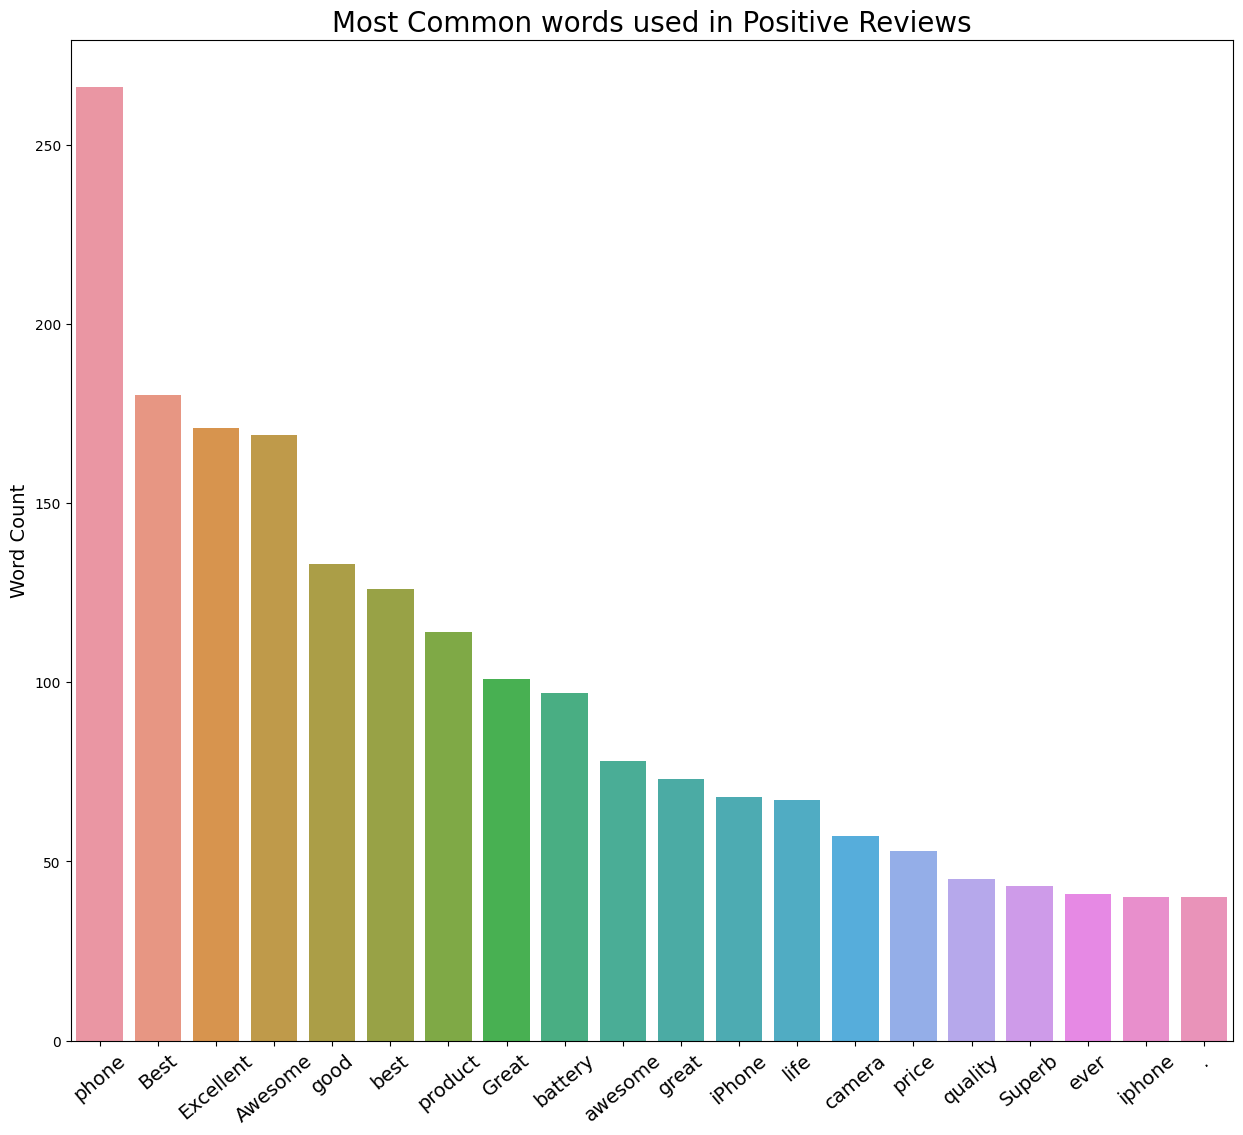

In [453]:
import seaborn as sns


plt.figure(figsize=(15,13))
sns.barplot(x=most_common_wordList[0:20], y=most_common_countList[0:20])
plt.ylabel('Word Count', fontsize=14)
plt.xticks(fontsize=14, rotation=40)
plt.title('Most Common words used in Positive Reviews', fontsize=20)
plt.show()


# Distribution of Positive Reviews

<Axes: >

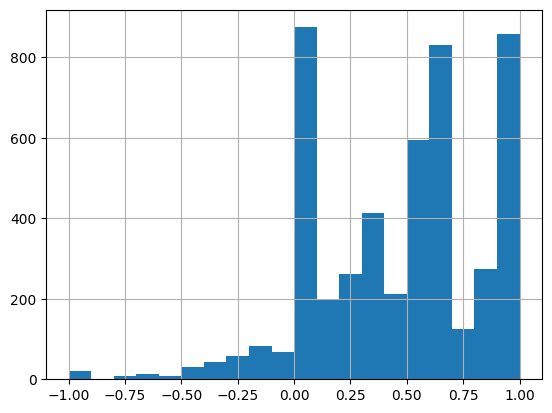

In [454]:
reviews_df.polarity.hist(bins=20)

# Displaying Negative Reviews

In [455]:
reviews_df[reviews_df.polarity<0.25].head(10)

,product,helpful_count,total_comments,review_country,reviewed_at,review_text,review_rating,review_title,polarity,subjectivity
0,Apple iPhone XR (64GB) - Black,"5,087",24,India,12/12/18,NOTE:,3,"Which iPhone you should Purchase ? iPhone 8, X, XS, XR ?",0.000000,0.000000
1,Apple iPhone XR (64GB) - Black,"2,822",6,India,11/17/18,Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I haven't got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees.,1,Don't buy iPhone xr from Amazon.,-0.152000,0.493333
3,Apple iPhone XR (64GB) - Black,"1,366",14,India,5/2/19,"So I got the iPhone XR just today. The product looks amazing. But unfortunately the Face ID is not working and there’s a glitch in the front camera’s portrait mode. That’s fine, it may happen. But what’s not fine is the pathetic service provided by amazon and apple. Firstly, amazon takes no resp...",1,Amazon is not an apple authorised reseller. Please take a note.,-0.033902,0.710985
5,Apple iPhone XR (64GB) - Black,313,2,India,4/22/19,I was delivered a phone that did not work immediately after removing from the box. I was not able to return it as I need to first check with Apple. Apple service told me that the phone was lying without charge since 5 months and hence the battery failed. Now I have had to leave the phone with Ap...,1,Never purchase a phone online.,-0.140000,0.345000
7,Apple iPhone XR (64GB) - Black,164,1,India,11/25/18,The phone is hanging. Video quality is not very good.,1,Exchange of I phone xr with xs.,-0.269231,0.461538
21,Apple iPhone XR (64GB) - Black,69,1,India,7/21/19,"Don't buy Apple products from Amazon. I got a defective product which is not activating. During first charging the iPhone started heating like anything. Since there was a 10 days replacement policy, so I asked Amazon to replace it as the product is defective. But very poor customer service from ...",1,Horrible Experience with Amazon,-0.135000,0.556667
22,Apple iPhone XR (64GB) - Black,63,0,India,4/4/19,Face recognition is slower some times. I have no complaints about it. I am die hard fan of XR. I was eagerly waiting for dual sim iPhone. It’s heavy but looks are so attractive that you will be ready to carry that little extra weight. I am using it since two months. Don’t watch any reviews. Just...,5,It fulfilled my expectations.,0.115530,0.467424
24,Apple iPhone XR (64GB) - Black,55,0,India,6/4/19,"There are lots of reviews on net for XR, I would give just quick points based on my experience of XR 128 GB.",5,A Dark Horse,0.166667,0.250000
25,Apple iPhone XR (64GB) - Black,62,1,India,11/27/18,Don’t buy this phone only waste of money it hang’s many time.,2,Hang’s many time,0.100000,0.500000
26,Apple iPhone XR (64GB) - Black,45,0,India,9/24/19,STEVE JOBS GONE i phone gone !!!!!!,1,I PHONE THOFE ME MILE THO LELO,0.000000,0.000000


# Displaying Most Common Words used in Negative Reviews

In [456]:
data['review_text'] = data['review_text'].astype(str)

In [457]:
stop_words = set(stopwords.words('english'))
negative_reviews = reviews_df[reviews_df.polarity<0.25]['review_text'].values


count = Counter()
for text in negative_reviews:
    for word in text.split():
        if word.lower() not in stop_words:
            count[word] += 1


most_common_words = count.most_common(50)
most_common_wordList = []
most_common_countList = []
for x, y in most_common_words:
    most_common_wordList.append(x)
    most_common_countList.append(y)

print(most_common_wordList) 


['phone', 'iPhone', 'product', 'good', 'battery', 'Apple', 'camera', 'apple', 'quality', 'XR', 'life', 'working', 'one', 'got', 'like', 'Battery', 'buy', 'iphone', 'amazon', 'time', 'money', 'screen', 'price', 'Amazon', '.', 'phone.', 'using', 'go', 'get', 'mobile', 'also', 'use', 'Camera', 'problem', 'even', ',', 'need', 'it.', 'little', 'bit', 'bad', 'experience', 'service', 'issue', 'heavy', 'days', 'bought', 'received', 'Face', 'product.']


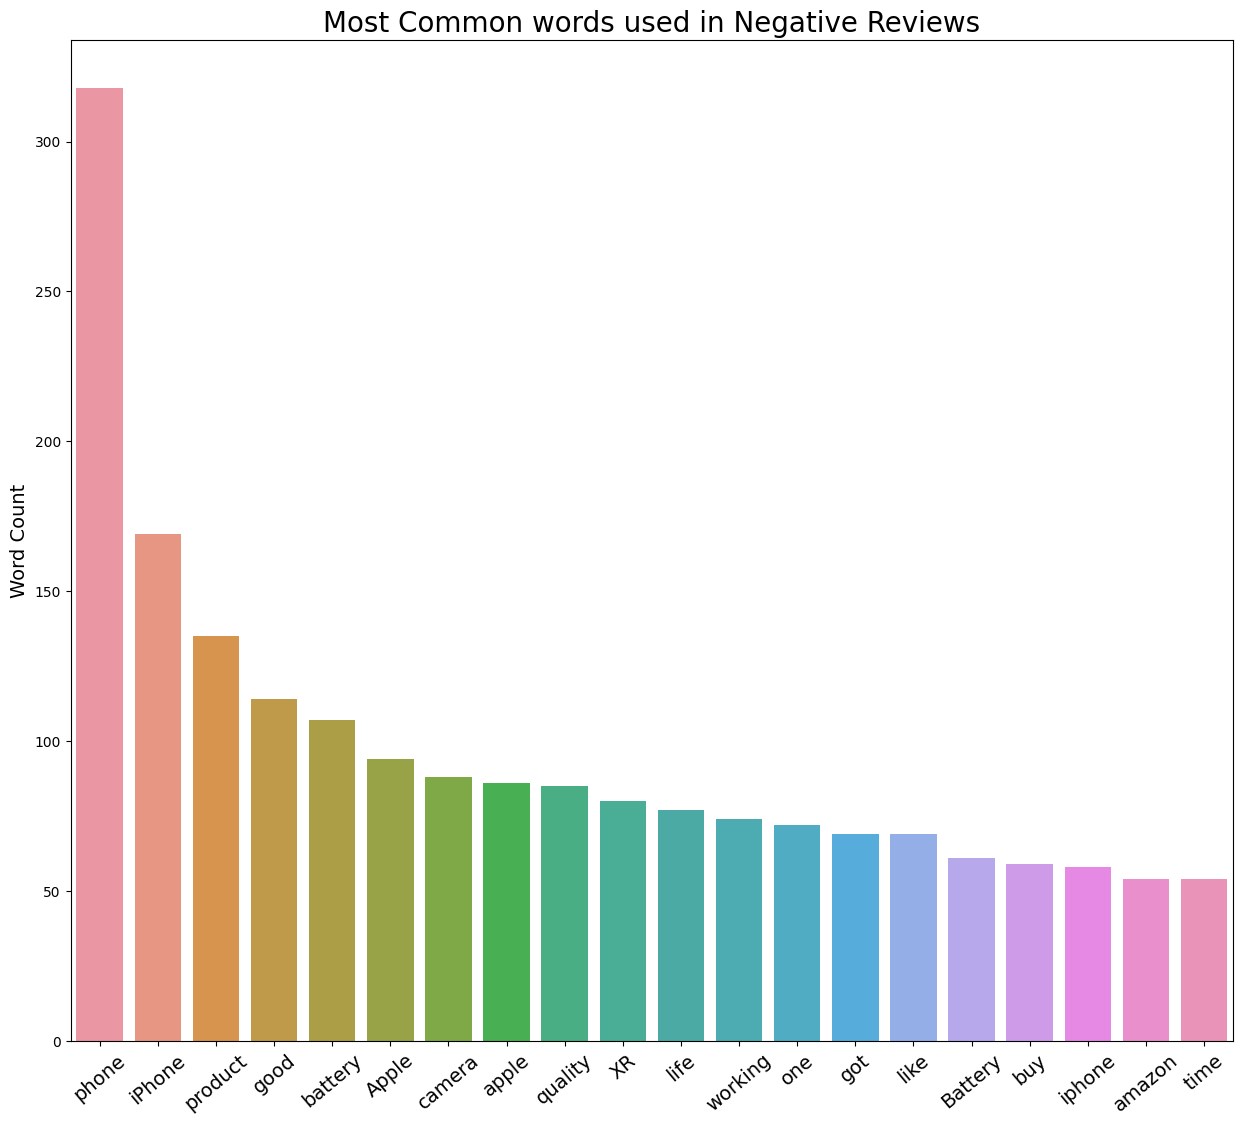

In [458]:
import seaborn as sns


plt.figure(figsize=(15,13))
sns.barplot(x=most_common_wordList[0:20], y=most_common_countList[0:20])
plt.ylabel('Word Count', fontsize=14)
plt.xticks(fontsize=14, rotation=40)
plt.title('Most Common words used in Negative Reviews', fontsize=20)
plt.show()


# Plotting count of Positive, Neutral and Negative Reviews

Text(0, 0.5, 'Number of Reviews')

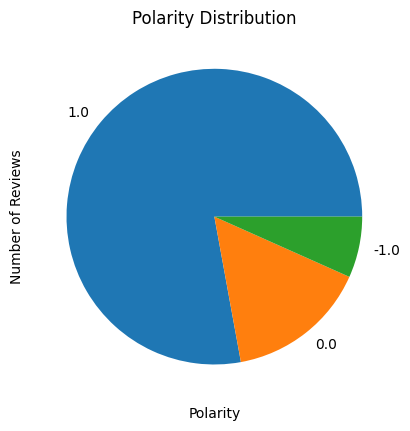

In [476]:
reviews_df['polarity'][reviews_df.polarity==0] = 0
reviews_df['polarity'][reviews_df.polarity>0] = 1
reviews_df['polarity'][reviews_df.polarity<0] = -1
reviews_df.polarity.value_counts().plot.pie()
reviews_df.polarity.value_counts()
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')

# Removing Punctuation marks and stopwords from Data

In [460]:
punct_to_remove = string.punctuation
print(punct_to_remove)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [461]:
#Function to remove punctuations
def remove_punctuation(x):
    if isinstance(x, str):
        return x.translate(str.maketrans("", "", punct_to_remove))
    else:
        return x


In [462]:
data['review_text'] = data['review_text'].apply(lambda x: remove_punctuation(x))
data['review_title'] = data['review_title'].apply(lambda x: remove_punctuation(x))

In [463]:
data.head(2)

,product,helpful_count,total_comments,review_country,reviewed_at,review_text,review_rating,review_title,polarity,subjectivity
0,Apple iPhone XR (64GB) - Black,"5,087",24,India,12/12/18,NOTE,3,Which iPhone you should Purchase iPhone 8 X XS XR,0.0,0.000000
1,Apple iPhone XR (64GB) - Black,"2,822",6,India,11/17/18,Very bad experience with this iPhone xr phone Back camera found defective and non functional Amazon is very careless I havent got any response on confirmation for replacing I am just hanging with a damaged piece worth of more than 91000 rupees,1,Dont buy iPhone xr from Amazon,-1.0,0.493333


In [464]:
import nltk

In [465]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshithabenakanahallinagaraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [466]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [467]:
stop_words = set(stopwords.words('english'))
reviews_df['review_text'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])


0                                                                                                                                                                                                                                                                                                            [NOTE]
1                                                                                                            [bad, experience, iPhone, xr, phone, Back, camera, found, defective, non, functional, Amazon, careless, havent, got, response, confirmation, replacing, hanging, damaged, piece, worth, 91000, rupees]
2                                                                                                                                                                                                                                [Amazing, phone, amazing, camera, coming, iPhone, 7, plus, great, service, amazon]
3       [got, iPhone, XR, today, product, looks, amazing, unfortunately, Fac

# Displaying Most Common 30 Words

In [468]:
from collections import Counter
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

cnt = Counter()
for text in data['review_text'].values:
    for word in text.split():
        if word.lower() not in stop_words:
            cnt[word]+=1

mostcommon=cnt.most_common(30)
print(mostcommon)


[('phone', 1383), ('good', 910), ('product', 702), ('iPhone', 576), ('battery', 532), ('Good', 487), ('life', 426), ('camera', 404), ('quality', 346), ('price', 278), ('best', 273), ('Apple', 263), ('XR', 256), ('Awesome', 242), ('one', 239), ('Best', 237), ('great', 234), ('apple', 234), ('Excellent', 232), ('Nice', 219), ('iphone', 211), ('awesome', 200), ('Amazon', 185), ('Battery', 183), ('buy', 181), ('Great', 176), ('amazon', 160), ('money', 160), ('got', 155), ('Amazing', 151)]


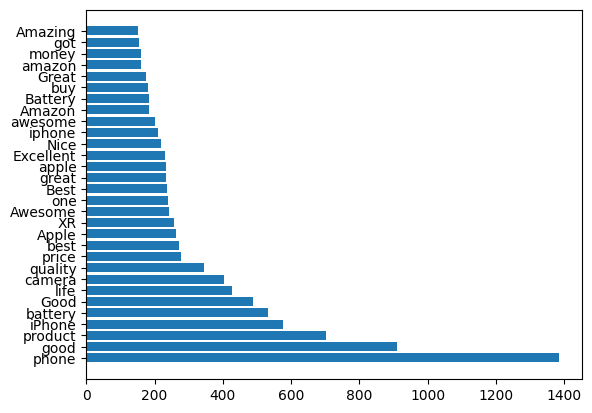

In [469]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

# Tokenization

In [470]:
from nltk import word_tokenize
data['Tokenized_Reviews'] = data['review_text'].apply(word_tokenize)
data.Tokenized_Reviews

0                                                                                                                                                                                                                                                                                                            [NOTE]
1                    [Very, bad, experience, with, this, iPhone, xr, phone, Back, camera, found, defective, and, non, functional, Amazon, is, very, careless, I, havent, got, any, response, on, confirmation, for, replacing, I, am, just, hanging, with, a, damaged, piece, worth, of, more, than, 91000, rupees]
2                                                                                                                                                                                                              [Amazing, phone, with, amazing, camera, coming, from, iPhone, 7, plus, great, service, from, amazon]
3       [So, I, got, the, iPhone, XR, just, today, The, product, looks, amaz

In [471]:
data.head(5)


,product,helpful_count,total_comments,review_country,reviewed_at,review_text,review_rating,review_title,polarity,subjectivity,Tokenized_Reviews
0,Apple iPhone XR (64GB) - Black,"5,087",24,India,12/12/18,NOTE,3,Which iPhone you should Purchase iPhone 8 X XS XR,0.0,0.000000,[NOTE]
1,Apple iPhone XR (64GB) - Black,"2,822",6,India,11/17/18,Very bad experience with this iPhone xr phone Back camera found defective and non functional Amazon is very careless I havent got any response on confirmation for replacing I am just hanging with a damaged piece worth of more than 91000 rupees,1,Dont buy iPhone xr from Amazon,-1.0,0.493333,"[Very, bad, experience, with, this, iPhone, xr, phone, Back, camera, found, defective, and, non, functional, Amazon, is, very, careless, I, havent, got, any, response, on, confirmation, for, replacing, I, am, just, hanging, with, a, damaged, piece, worth, of, more, than, 91000, rupees]"
2,Apple iPhone XR (64GB) - Black,"1,798",0,India,1/27/19,Amazing phone with amazing camera coming from iPhone 7 plus great service from amazon,5,Happy with the purchase,1.0,0.850000,"[Amazing, phone, with, amazing, camera, coming, from, iPhone, 7, plus, great, service, from, amazon]"
3,Apple iPhone XR (64GB) - Black,"1,366",14,India,5/2/19,So I got the iPhone XR just today The product looks amazing But unfortunately the Face ID is not working and there’s a glitch in the front camera’s portrait mode That’s fine it may happen But what’s not fine is the pathetic service provided by amazon and apple Firstly amazon takes no responsibil...,1,Amazon is not an apple authorised reseller Please take a note,-1.0,0.710985,"[So, I, got, the, iPhone, XR, just, today, The, product, looks, amazing, But, unfortunately, the, Face, ID, is, not, working, and, there, ’, s, a, glitch, in, the, front, camera, ’, s, portrait, mode, That, ’, s, fine, it, may, happen, But, what, ’, s, not, fine, is, the, pathetic, service, prov..."
4,Apple iPhone XR (64GB) - Black,536,5,India,5/24/19,Ive been an android user all my life until I decided to try iPhone XR for iOS Loving the camera and battery life is an absolute joy to have Its been more than one month since I got this phone and Im loving it Face ID works flawlessly even in the dark and the dual sim function is working like a c...,5,Excellent Battery life and buttery smooth UI,1.0,0.675000,"[Ive, been, an, android, user, all, my, life, until, I, decided, to, try, iPhone, XR, for, iOS, Loving, the, camera, and, battery, life, is, an, absolute, joy, to, have, Its, been, more, than, one, month, since, I, got, this, phone, and, Im, loving, it, Face, ID, works, flawlessly, even, in, the..."


# Stemming

In [472]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    text ="".join(text)
    return text

data['Stemmed_Reviews'] = data['Tokenized_Reviews'].apply(stemming)
data.Stemmed_Reviews

0                                                                                                                                                                                                                                                                                                              note
1                                                                                                                                   veribadexperiwiththisiphonxrphonebackcamerafounddefectandnonfunctionamazonisvericarelessihaventgotaniresponsonconfirmforreplaciamjusthangwithadamagpiecworthofmorethan91000rupe
2                                                                                                                                                                                                                                                    amazphonewithamazcameracomefromiphon7plusgreatservicfromamazon
3       soigottheiphonxrjusttodaytheproductlookamazbutunfortunthefaceidisnot

# Lemmantizing

In [473]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmantizing(text):
    text = [lemmatizer.lemmatize(word) for word in text]
    text ="".join(text)
    return text

data['Lemmantized_Reviews'] = data['Tokenized_Reviews'].apply(lemmantizing)
data.Lemmantized_Reviews

0                                                                                                                                                                                                                                                                                                              NOTE
1                                                                                                         VerybadexperiencewiththisiPhonexrphoneBackcamerafounddefectiveandnonfunctionalAmazonisverycarelessIhaventgotanyresponseonconfirmationforreplacingIamjusthangingwithadamagedpieceworthofmorethan91000rupee
2                                                                                                                                                                                                                                          AmazingphonewithamazingcameracomingfromiPhone7plusgreatservicefromamazon
3       SoIgottheiPhoneXRjusttodayTheproductlookamazingButunfortunatelytheFa

# VADER MODEL


**The overall sentiment of the IPhone reviews**

In [474]:
x = sum(data_analysis["Positive"])
y = sum(data_analysis["Negative"])
z = sum(data_analysis["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative ")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


 **Sentiment Score of each category**

In [475]:
print("Positive: ", round(x,2))
print("Negative: ", round(y,2))
print("Neutral: ", round(z,2))

Positive:  448.0
Negative:  3.0
Neutral:  4509.0


**We can see that, according to  VADER model, sentiment score is Neutral.**